# Review with bank marketing data

## Introduction

- Data from the UCI Machine Learning Repository: [data](https://github.com/sinanuozdemir/sfdat22/blob/master/data/bank.csv), [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal:** Predict whether a customer will purchase a bank product marketed over the phone
- `bank.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bank = pd.read_csv('../data/bank.csv', sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
bank.shape

(4119, 21)

In [8]:
# Do we have any null values?
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Step 2: Prepare at least three features

- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [6]:
# list all columns (for reference)
features = bank.columns.tolist()
print features

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


### y (response)

In [10]:
# convert the response to numeric values and store as a new column called "outcome"
bank['outcome'] = bank.y.map({'no':0,'yes':1})
bank['outcome'].head()

0    0
1    0
2    0
3    0
4    0
Name: outcome, dtype: int64

Let's explore a few columns manually and visually

### age

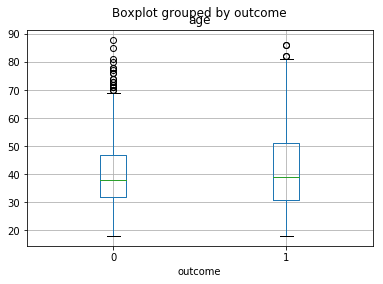

In [13]:
# Solution
# probably not a great feature, why?
bank.boxplot(column='age', by='outcome')

### job

TypeError: unsupported operand type(s) for /: 'str' and 'int'

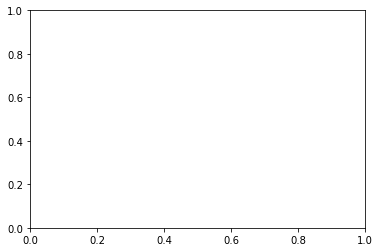

In [14]:
# Group by job and look at a boxplot exploring the mean 
bank.boxplot(column='job', by='outcome')

In [ ]:

# Ask yourself, WHY is this going to be useful?

In [ ]:
# create job_dummies (we will add it to the bank DataFrame later)

# remove the first job from the list (making it k-1 columns) where k is the number of jobs


### default

In [ ]:
 
# How many people have a value of no, yes, and unknown?
# TODO
print "\n"*20

In [ ]:
# Solution!

# only one person in the dataset has a status of yes

In [ ]:
# So, let's treat this as a 2-class feature rather than a 3-class feature


### contact

In [ ]:
# looks like a useful feature


In [ ]:
# Exercise! 
# Convert the feature to numeric values, 0 for cellular, 1 for telephone
# TODO
print "\n"*20

In [ ]:
# Solution!


### month

In [ ]:
# looks like a useful feature at first glance


In [ ]:
# but, it looks like their success rate is actually just correlated with number of calls
# thus, the month feature is unlikely to generalize


### duration

In [ ]:
# looks like an excellent feature, can you think of a reason why duration isn't helpful in practice?


### previous

In [ ]:
# looks like a useful feature


### poutcome

In [ ]:
# looks like a useful feature


In [ ]:
# create poutcome_dummies


In [ ]:
# concatenate bank DataFrame with job_dummies and poutcome_dummies


### euribor3m

In [ ]:
# looks like an excellent feature


## Step 3: Model building

- Use cross-validation to evaluate the AUC of a logistic regression model with your chosen features
- Try to increase the AUC by selecting different sets of features

In [ ]:
# new list of columns (including dummy columns)


In [ ]:
# create X (including 13 dummy columns)


In [ ]:
# create y


In [ ]:
# Exercise! 
# calculate cross-validated Accuracy for logisic regression, and knn with 5 neighbors
# TODO
print "\n"*20

In [ ]:
# use grid search to try k in range from 1-29 (odd only) for knn, and graph the accuracy from a cross val score vs the k
# TODO
print "\n"*20

In [ ]:
#whats the best estimator

In [ ]:
# look's like adding to k after 5 doesn't even help that much....

In [ ]:
# Exercise! 
# Create a confusion matrix from the best estimator in the gridsearch and find the accuracy, sensitivity, and specificity
# TODO
print "\n"*20

In [ ]:
# Exercise! 
# Compare the accuracy to the null accuracy rate
# TODO
print "\n"*20

In [ ]:
# What can we do to make the model better?

# Thought Experiment

What if we want to regress to the duration of the call so the rep can better plan their day?

Build a linear regression model to do this.